____
# Lesson 4: Data Exploration and Scikit-Learn
____
In this final Python lesson, we'll use everything we've learned so far and work with some real datasets. We'll also finally use the Scikit-Learn library (called `sklearn` in Python) to do some basic machine learning on some sample data.

## Some important imports

In Jupyter Notebooks, we can import the libraries we need once, and then use the libraries on all future code blocks without needing to re-import everything. 

Run the following code block:

In [ ]:
%matplotlib inline
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# some code to control figure aeshetics
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Rapid Fire Review Questions!

### Slicing

#### Q1: Output the last two elements from the list below

In [ ]:
my_list = ["Programming","Is","Really","Fun"]

In [ ]:
sub_list = my_list[2:]
my_list[2:]

['Really', 'Fun']

In [ ]:
sub_list

['Really', 'Fun']

In [ ]:
my_list[-2:]

['Really', 'Fun']

In [ ]:
my_list[(len(my_list)-2):]

['Really', 'Fun']

#### Q2: Change the third element "Really" to "Super"

In [ ]:
my_list[2] = "Super"
my_list

['Programming', 'Is', 'Super', 'Fun']

### Collections

#### Q3: We just modified a list... Can you modify the following collections? (Yes or No)

1) Set
```python
   my_set = set(["Programming","Is","Is","Really","Fun"])
```
2) Dictionary
```python
    my_dict = {"Lesson 1":"Loops", "Lesson 2": "Functions", "Lesson 3":"Matplotlib"}
```
3) Tuple
```python
    my_tuple = ("item1","item2")
```

# Dataset Introduction

Before we can start to do machine learning, we need to have data to train our systems on. If you remember in the "Introduction to Machine Learning" lesson, datasets aren't always easy to come by, and many are privately collected and owned. Very often, if you want to work on a new machine learning application, you may have to figure out how to collect your own data.

However, there are many great services that have open and free datasets that you can use, like [Kaggle](https://www.kaggle.com/). For this lesson, we'll use a dataset from Kaggle that contains gene expression for patients with ALL and AML from [Golub et al., Science, 1999](https://science.sciencemag.org/content/286/5439/531.long).

The morphological differences are subtle and can be difficult to disinguish by eye in practice.

ALL| AML | 
----------------------------------|------------------------------|
![Acute Lymphoblastic Leukemia (ALL)](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Acute_leukemia-ALL.jpg/200px-Acute_leukemia-ALL.jpg) |![Acute Myeloid Leukemia (AML)](https://s7d2.scene7.com/is/image/stjude/aml-leukemia-bm-m4?fit=crop,1&wid=200)

Due to this [Golub et al.](https://science.sciencemag.org/content/286/5439/531.long) wanted to explore a more systematic approach to classification... by using gene expression measured from the bone marrow of acute leukemia patients.

#### GOAL: Use gene expression to classify patients as ALL or AML

#### APPROACH
1. Summarize and visualize our dataset
2. Split our data into training and testing
3. Classify patients!


# Working with `Pandas`


![](https://cdn-images-1.medium.com/max/1200/1*tiFm2E0nCXp4Bc1Rk8OhdA.jpeg)

Before we jump into machine learning, let's practice looking at datasets and exploring them. We'll use a library called `pandas` to help us do this.

We've already imported `pandas` earlier in the Notebook, so we can use it in the following code blocks. If you did not run the first code block of this lesson, the following code will raise an error.

In [ ]:
# This is the file we will work with.

# They are "CSV" files, which stands for "comma-separated values file"
# Really, it's just a long text file with a lot of information separated by commas
# We will use a function built into pandas to read our csv data

data = pd.read_csv("data.csv",index_col=0) # for tab you would use sep = "\t"
phenos = pd.read_csv("actual.csv",index_col=0)

# We can visualize the top 10 lines of our training data with the below function
data.head(n=10)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,-165,-67,-92,-113,-107,-117,-476,-81,-44,17,-144,-247,-74,-120,-81,-112,-273,-4,15,-318,-32,-124,-135,-20,7,-213,-25,-72,-342,-87,-62,22,86,-146,-187,-56,-243,-130,-256,-118,-112,-21,-202,-90,-34,-95,-137,-157,-12,-172,-47,-176,-161,-48,-62,-58,-76,-154,-79,-55,-59,-131
AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,-155,-93,-119,-147,-72,-219,-213,-150,-51,-229,-199,-90,-321,-263,-150,-233,-327,-116,-114,-192,-49,-79,-186,-207,-100,-252,-20,-139,-200,-248,-23,-153,-36,-74,-187,-43,-218,-177,-249,-142,-185,-13,-274,-87,-144,-118,-51,-370,-172,-122,-442,-284,-215,-531,-198,-217,-98,-136,-118,-44,-114,-126
AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,106,42,-71,84,-31,-118,-126,-50,-18,-119,100,79,-157,-168,-11,-114,-85,-78,-76,-125,2,-95,49,-37,-70,-50,-57,136,124,-1,41,262,-7,17,-141,170,312,43,-163,-28,-410,212,24,8,59,102,-17,59,-82,-77,12,38,-21,-81,-46,-124,-5,63,-153,49,-30,12,23,-50
AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,268,219,82,25,173,243,149,257,301,78,207,218,132,-24,-36,255,316,54,81,241,193,312,230,330,337,101,132,318,325,392,328,295,142,276,252,174,142,177,182,266,24,314,170,38,309,319,152,270,178,340,172,31,396,9,146,431,141,95,237,180,68,129,146,211
AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,-163,-179,-233,-127,-205,-218,-403,-152,-146,-262,-151,-308,-317,-342,-418,-244,-439,-191,-51,-139,-367,-188,-407,-369,-377,-209,-396,-324,-224,-226,-233,-211,-201,-32,114,-116,-289,-170,-535,-401,-197,-128,-456,-283,-174,-229,-135,-438,-137,-201,-351,-294,-172,-496,-256,-191,-215,-257,-110,-108,-171,-206
AFFX-BioDn-5_at,-558,-400,-650,-585,-284,-558,-551,-790,-535,-246,-430,-323,-227,-398,-284,-402,-394,-340,-221,-404,-347,-571,-499,-396,-461,-275,-616,-411,-155,-344,-508,-423,-566,-529,-478,-557,-464,-510,-427,-493,-284,-250,-384,-318,-148,-184,-268,-326,-810,-452,-400,-245,-581,-385,-289,-383,-320,-364,-205,-226,-394,-493,-596,-696,-206,-230,-122,-273,-264,-301,-227,-287
AFFX-BioDn-3_at,199,-330,33,158,4,67,131,-275,0,328,100,-135,-49,-249,-166,228,-42,-36,83,326,-118,-170,-138,-412,-66,-479,419,-31,29,324,-349,-31,-141,14,-351,40,-221,-350,-656,367,-167,55,-420,8,-184,-105,-285,-222,709,-336,-215,409,-159,-726,361,172,-13,-216,358,242,236,-393,-122,-1038,-298,-86,-68,141,-28,-222,-73,-34
AFFX-CreX-5_at,-176,-168,-367,-253,-122,-186,-179,-463,-174,-148,-109,-127,-62,-228,-185,-147,-144,-141,-198,-201,-24,-224,-119,-153,-184,-108,-251,-240,-105,-237,-194,-223,-315,-365,-290,-243,-390,-202,-292,-452,-97,-141,-197,-152,-133,-62,-172,-93,-316,-310,-227,-102,-343,-271,-89,-187,-11,-210,-104,-117,-39,-141,-341,-441,-218,-152,-118,-123,-61,-133,-126,-114
AFFX-CreX-3_at,252,101,206,49,70,87,126,70,24,177,56,-2,13,-37,1,65,98,96,34,6,126,124,115,184,164,136,165,150,42,105,34,-82,206,153,283,119,-1,249,137,194,-12,0,-60,-148,12,0,52,10,27,177,100,85,236,-12,87,185,112,-86,-25,-6,95,166,171,235,-14,-6,6,52,40,136,-6,62


### First let's get some summary info about the data

In [ ]:
# We can check the number of samples and number of genes
data.shape

(7129, 72)

In [ ]:
# We can also output columns names (or samples)
data.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61',
       '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72'],
      dtype='object')

In [ ]:
# And row names (or genes)
data.index

Index(['AFFX-BioB-5_at', 'AFFX-BioB-M_at', 'AFFX-BioB-3_at', 'AFFX-BioC-5_at',
       'AFFX-BioC-3_at', 'AFFX-BioDn-5_at', 'AFFX-BioDn-3_at',
       'AFFX-CreX-5_at', 'AFFX-CreX-3_at', 'AFFX-BioB-5_st',
       ...
       'U48730_at', 'U58516_at', 'U73738_at', 'X06956_at', 'X16699_at',
       'X83863_at', 'Z17240_at', 'L49218_f_at', 'M71243_f_at', 'Z78285_f_at'],
      dtype='object', name='Gene Accession Number', length=7129)

In [ ]:
# This gives us some summary statistics about int/float columns
data.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
count,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.00000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.00000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000
mean,641.367092,690.246318,698.307897,600.985271,679.532894,564.797728,584.437649,571.359097,789.713705,599.483097,632.253893,492.600224,674.656614,648.611586,705.779071,624.578202,791.401599,557.565577,558.631505,954.423061,577.650302,524.758311,532.252350,662.166784,597.863796,603.313368,501.343807,673.279422,556.463179,718.934493,598.648899,676.920887,723.563473,618.858606,514.496704,775.143498,689.248141,626.885959,582.194978,527.819329,565.152476,603.813719,563.614252,531.401599,530.194137,547.590966,576.027213,751.464862,601.516763,639.388273,574.822275,598.648899,733.883013,668.70122,531.729135,551.572170,497.195820,561.964371,545.038715,561.004629,581.006593,671.16496,727.593351,686.850610,556.054145,530.495020,601.796746,734.933511,744.386590,520.213354,575.054987,617.254454
std,2264.294361,2468.814372,2485.656277,2340.047428,2375.895416,2494.604090,2412.812263,2378.780450,2580.157021,2421.156219,2403.004217,2325.076036,2336.920570,2378.447105,2405.213633,2326.350674,2558.175067,2312.371340,2281.113163,2685.262409,2499.347684,2325.875278,2398.704731,2346.561536,2390.180133,2295.469269,2372.946804,2413.149603,2376.681824,2533.678058,2405.268550,2436.964933,2507.382019,2390.125395,2440.722824,2676.664777,2543.537830,2473.180838,2473.986881,2304.800191,2352.036107,2377.775459,2521.409254,2335.848476,2368.906095,2359.761385,2436.848381,2437.815002,2432.454360,2415.961745,2488.547066,2565.122835,2547.086522,2505.06701,2434.701598,2455.517016,2436.468032,2688.424072,2620.219568,2615.321812,2467.740997,2659.95898,2488.340963,2703.734409,2360.238246,2463.108827,2392.539227,2433.042040,2396.618703,2362.872338,2309.515245,2302.908490
min,-19826.000000,-17930.000000,-27182.000000,-23396.000000,-10339.000000,-21658.000000,-24024.000000,-27570.000000,-25171.000000,-12500.000000,-17480.000000,-15256.000000,-12854.000000,-14937.000000,-13380.000000,-10492.000000,-19523.000000,-8692.000000,-11572.000000,-13838.000000,-7397.000000,-17179.000000,-14937.000000,-17368.000000,-17377.000000,-10652.000000,-20406.000000,-20376.000000,-9501.000000,-17580.000000,-25491.000000,-28400.000000,-27811.000000,-17310.000000,-16281.000000,-27398.000000,-23673.000000,-23645.000000,-21984.000000,-21296.000000,-7764.000000,-10481.000000,-13905.000000,-9619.000000,-5353.000000,-8318.000000,-7861.000000,-16945.000000,-26775.000000,-24493.000000,-22571.000000,-11169.000000,-20698.000000,-11978.00000,-9881.000000,-13390.000000,-11067.000000,-16131.000000,-13436.000000,-9338.000000,-16268.000000,-11973.00000,-20782.000000,-26258.000000,-14244.000000,-7626.000000,-11234.000000,-12527.000000,-10279.000000,-11535.000000,-10873.000000,-8646.000000
25%,-21.000000,-14.000000,-31.000000,-33.000000,8.000000,-26.000000,-33.000000,-58.000000,-14.000000,-15.000000,-17.000000,-25.000000,-6.000000,-6.000000,0.000000,-12.000000,-33.000000,-9.000000,-15.000000,-1.000000,-14.000000,-31.000000,-32.000000,-10.000000,-9.00

In [ ]:
# We also have info about sample phenotypes
phenos

,cancer
patient,
1,ALL
2,ALL
3,ALL
4,ALL
5,ALL
...,...
68,ALL
69,ALL
70,ALL


### Exercise: Determine how many samples are ALL and how many are AML using a python data structure. 

EX - `list`, `set`, or `dictionary`

In [ ]:
# How should I determine this? What python data structure can I use to figure this out?

# What should I do?

count_dict = {"AML":0,"ALL":0}

for item in phenos["cancer"]:
  count_dict[item]+=1
  # count_dict[item] = count_dict[item]+1

In [ ]:
count_dict

{'ALL': 47, 'AML': 25}

In [ ]:
# We can also use pandas built in functions and get totals of each cancer type
phenos.groupby(['cancer']).size()

cancer
ALL    47
AML    25
dtype: int64

# Plotting Time!

### Bar plot of cancer types

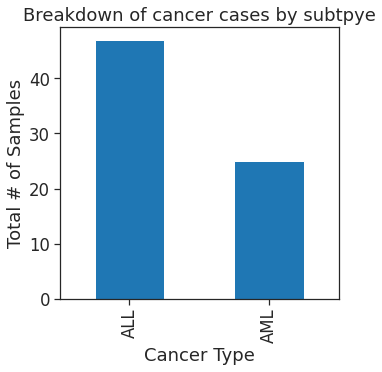

In [ ]:
# First we can plot cases by country
# pandas has a convenient function for this
count_by_cancer = phenos.groupby(['cancer']).size()
count_by_cancer.plot.bar(y="patient",figsize=(5,5),legend=False)
# setting labels make plots more informative
plt.xlabel("Cancer Type")
plt.ylabel("Total # of Samples")
# titles are important for plot interpretation!
plt.title("Breakdown of cancer cases by subtpye")
plt.show()

### Heatmap of expression across samples

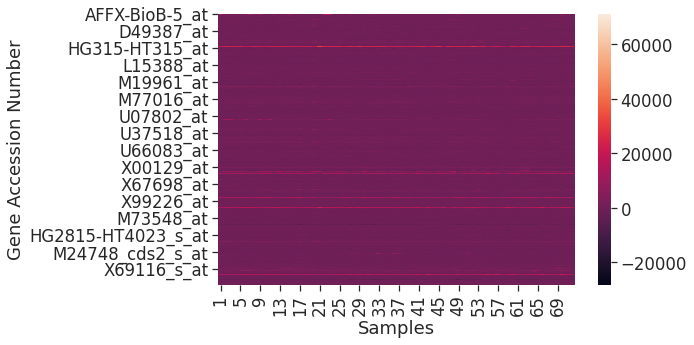

In [ ]:
# We can also create a heatmap of the gene expression
# create empty figure
fig,ax = plt.subplots(figsize=(8,5))
# add heatmap
sns.heatmap(data,ax=ax)
# set informative x label
plt.xlabel("Samples")
plt.show()

In [ ]:
# There are MANY genes which makes it hard to visualize the data with a heatmap
# Let's select 5 genes for plotting
# Pandas .iloc function can help us do this
data.iloc[:5,:]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,-165,-67,-92,-113,-107,-117,-476,-81,-44,17,-144,-247,-74,-120,-81,-112,-273,-4,15,-318,-32,-124,-135,-20,7,-213,-25,-72,-342,-87,-62,22,86,-146,-187,-56,-243,-130,-256,-118,-112,-21,-202,-90,-34,-95,-137,-157,-12,-172,-47,-176,-161,-48,-62,-58,-76,-154,-79,-55,-59,-131
AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,-155,-93,-119,-147,-72,-219,-213,-150,-51,-229,-199,-90,-321,-263,-150,-233,-327,-116,-114,-192,-49,-79,-186,-207,-100,-252,-20,-139,-200,-248,-23,-153,-36,-74,-187,-43,-218,-177,-249,-142,-185,-13,-274,-87,-144,-118,-51,-370,-172,-122,-442,-284,-215,-531,-198,-217,-98,-136,-118,-44,-114,-126
AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,106,42,-71,84,-31,-118,-126,-50,-18,-119,100,79,-157,-168,-11,-114,-85,-78,-76,-125,2,-95,49,-37,-70,-50,-57,136,124,-1,41,262,-7,17,-141,170,312,43,-163,-28,-410,212,24,8,59,102,-17,59,-82,-77,12,38,-21,-81,-46,-124,-5,63,-153,49,-30,12,23,-50
AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,268,219,82,25,173,243,149,257,301,78,207,218,132,-24,-36,255,316,54,81,241,193,312,230,330,337,101,132,318,325,392,328,295,142,276,252,174,142,177,182,266,24,314,170,38,309,319,152,270,178,340,172,31,396,9,146,431,141,95,237,180,68,129,146,211
AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,-163,-179,-233,-127,-205,-218,-403,-152,-146,-262,-151,-308,-317,-342,-418,-244,-439,-191,-51,-139,-367,-188,-407,-369,-377,-209,-396,-324,-224,-226,-233,-211,-201,-32,114,-116,-289,-170,-535,-401,-197,-128,-456,-283,-174,-229,-135,-438,-137,-201,-351,-294,-172,-496,-256,-191,-215,-257,-110,-108,-171,-206


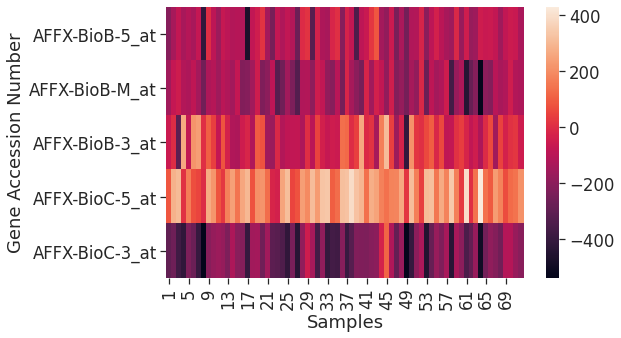

In [ ]:
# Now we can plot!
sub_data = data.iloc[:5,:]
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(sub_data,ax=ax)
plt.xlabel("Samples")
plt.show()

In [ ]:
# If we have a gene list we can also extract from a pandas dataframe with .loc
gene_list = ["AFFX-BioB-5_at","AFFX-BioB-M_at","AFFX-BioB-3_at","AFFX-BioC-5_at","AFFX-BioC-3_at"]
data.loc[gene_list,:]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,-165,-67,-92,-113,-107,-117,-476,-81,-44,17,-144,-247,-74,-120,-81,-112,-273,-4,15,-318,-32,-124,-135,-20,7,-213,-25,-72,-342,-87,-62,22,86,-146,-187,-56,-243,-130,-256,-118,-112,-21,-202,-90,-34,-95,-137,-157,-12,-172,-47,-176,-161,-48,-62,-58,-76,-154,-79,-55,-59,-131
AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,-155,-93,-119,-147,-72,-219,-213,-150,-51,-229,-199,-90,-321,-263,-150,-233,-327,-116,-114,-192,-49,-79,-186,-207,-100,-252,-20,-139,-200,-248,-23,-153,-36,-74,-187,-43,-218,-177,-249,-142,-185,-13,-274,-87,-144,-118,-51,-370,-172,-122,-442,-284,-215,-531,-198,-217,-98,-136,-118,-44,-114,-126
AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,106,42,-71,84,-31,-118,-126,-50,-18,-119,100,79,-157,-168,-11,-114,-85,-78,-76,-125,2,-95,49,-37,-70,-50,-57,136,124,-1,41,262,-7,17,-141,170,312,43,-163,-28,-410,212,24,8,59,102,-17,59,-82,-77,12,38,-21,-81,-46,-124,-5,63,-153,49,-30,12,23,-50
AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,268,219,82,25,173,243,149,257,301,78,207,218,132,-24,-36,255,316,54,81,241,193,312,230,330,337,101,132,318,325,392,328,295,142,276,252,174,142,177,182,266,24,314,170,38,309,319,152,270,178,340,172,31,396,9,146,431,141,95,237,180,68,129,146,211
AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,-163,-179,-233,-127,-205,-218,-403,-152,-146,-262,-151,-308,-317,-342,-418,-244,-439,-191,-51,-139,-367,-188,-407,-369,-377,-209,-396,-324,-224,-226,-233,-211,-201,-32,114,-116,-289,-170,-535,-401,-197,-128,-456,-283,-174,-229,-135,-438,-137,-201,-351,-294,-172,-496,-256,-191,-215,-257,-110,-108,-171,-206


In [ ]:
data.iloc[:5,:8]

,1,2,3,4,5,6,7,8
Gene Accession Number,,,,,,,,
AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413
AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260
AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7
AFFX-BioC-5_at,88,283,309,12,168,71,55,-2
AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541


In [ ]:
data.loc[:,["1","2","3","4","5","6","7","8"]].head()

,1,2,3,4,5,6,7,8
Gene Accession Number,,,,,,,,
AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413
AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260
AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7
AFFX-BioC-5_at,88,283,309,12,168,71,55,-2
AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541


In [ ]:
data.var(axis=1).sort_values(ascending=False)

Gene Accession Number
M25079_s_at           2.526051e+08
HG1428-HT1428_s_at    1.217362e+08
hum_alu_at            1.184315e+08
D86974_at             1.098853e+08
M26602_at             1.008080e+08
                          ...     
Z83806_at             9.432950e+02
Z70723_at             8.738865e+02
X56088_s_at           8.334599e+02
AC000062_at           8.125133e+02
L07949_at             7.130561e+02
Length: 7129, dtype: float64

In [ ]:
# We can also use pandas to find the genes with the highest variance across samples
data_var = data.var(axis=1).sort_values(ascending=False)
print(data_var)
print("\n")
# This is known as a series in python
print("Our data type")
print(type(data_var))

Gene Accession Number
M25079_s_at           2.526051e+08
HG1428-HT1428_s_at    1.217362e+08
hum_alu_at            1.184315e+08
D86974_at             1.098853e+08
M26602_at             1.008080e+08
                          ...     
Z83806_at             9.432950e+02
Z70723_at             8.738865e+02
X56088_s_at           8.334599e+02
AC000062_at           8.125133e+02
L07949_at             7.130561e+02
Length: 7129, dtype: float64


Our data type
<class 'pandas.core.series.Series'>


In [ ]:
# In a series we can separate indices
print(data_var.index)
# and values
print("\n")
print(data_var.values)

Index(['M25079_s_at', 'HG1428-HT1428_s_at', 'hum_alu_at', 'D86974_at',
       'M26602_at', 'D49824_s_at', 'Z84721_cds2_at', 'L06499_at',
       'M26311_s_at', 'X00274_at',
       ...
       'U35376_at', 'X65233_at', 'U49516_at', 'S76853_s_at', 'U73330_at',
       'Z83806_at', 'Z70723_at', 'X56088_s_at', 'AC000062_at', 'L07949_at'],
      dtype='object', name='Gene Accession Number', length=7129)


[2.52605136e+08 1.21736249e+08 1.18431464e+08 ... 8.33459898e+02
 8.12513302e+02 7.13056142e+02]


### Exercise: Make a heatmap of the top 10 genes with the highest variance across our cancer samples 

In [ ]:
topgenes = data.var(axis=1).sort_values(ascending=False).index[:10]


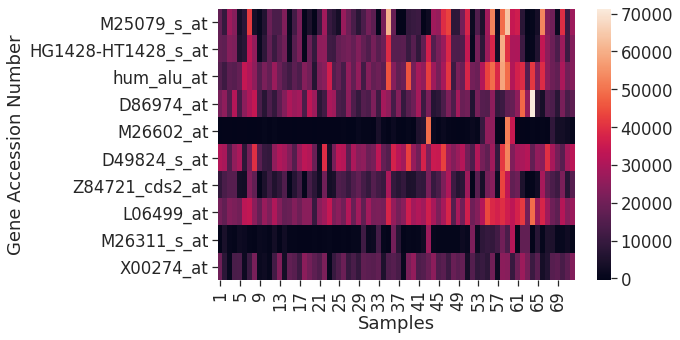

In [ ]:
# Hint: Use what we learned above to extract these top genes from our original
# gene expression data and make a heatmap
# data.var(axis=1).sort_values(ascending=False)
topgenes = data.var(axis=1).sort_values(ascending=False).index[:10]

# Now we can plot!
sub_data = data.loc[topgenes,:]
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(sub_data,ax=ax)
plt.xlabel("Samples")
plt.show()

# Is gene expression a good marker for cancer subtype?

Before building a model sometimes it's good to so some exploratory analysis...

### Finding differentially expressed genes between ALL and AML samples


Lets separate our ALL from our AML patients by using `boolean` indexing

In [ ]:
phenos.head()

,cancer
patient,
1,ALL
2,ALL
3,ALL
4,ALL
5,ALL


In [ ]:
phenos["cancer"] == "AML"

patient
1     False
2     False
3     False
4     False
5     False
      ...  
68    False
69    False
70    False
71    False
72    False
Name: cancer, Length: 72, dtype: bool

In [ ]:
phenos.head()

,cancer
patient,
1,ALL
2,ALL
3,ALL
4,ALL
5,ALL


In [ ]:
phenos[phenos["cancer"] == "ALL"].index # why does this work?

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 39, 40, 41, 42, 43, 44, 45,
            46, 47, 48, 49, 55, 56, 59, 67, 68, 69, 70, 71, 72],
           dtype='int64', name='patient')

In [ ]:
patient_id_ALL = list(phenos[phenos["cancer"] == "ALL"].index.astype(str)) # we did this because it was an int before which didn't match our expression data
patient_id_AML = list(phenos[phenos["cancer"] == "AML"].index.astype(str))

In [ ]:
phenos[phenos["cancer"] == "ALL"].index.astype(str)

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '55', '56', '59', '67', '68', '69', '70', '71', '72'],
      dtype='object', name='patient')

### Group exercise: Split our gene expression data into expression for AML patients and expression for ALL patients

Name the ALL subset `expr_ALL` and the AML subset `expr_AML`

In [ ]:
data.loc[:,patient_id_ALL]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,39,40,41,42,43,44,45,46,47,48,49,55,56,59,67,68,69,70,71,72
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,-165,-67,-92,-113,-107,-117,-476,-81,-44,17,-144,-247,-74,-120,-81,-112,-273,-342,-87,-62,22,86,-146,-187,-56,-243,-130,-256,-34,-95,-12,-76,-154,-79,-55,-59,-131
AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,-155,-93,-119,-147,-72,-219,-213,-150,-51,-229,-199,-90,-321,-263,-150,-233,-327,-200,-248,-23,-153,-36,-74,-187,-43,-218,-177,-249,-144,-118,-172,-98,-136,-118,-44,-114,-126
AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,106,42,-71,84,-31,-118,-126,-50,-18,-119,100,79,-157,-168,-11,-114,-85,-78,-76,41,262,-7,17,-141,170,312,43,-163,-28,-410,-17,59,12,-153,49,-30,12,23,-50
AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,268,219,82,25,173,243,149,257,301,78,207,218,132,-24,-36,255,316,54,81,328,295,142,276,252,174,142,177,182,266,24,152,270,172,237,180,68,129,146,211
AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,-163,-179,-233,-127,-205,-218,-403,-152,-146,-262,-151,-308,-317,-342,-418,-244,-439,-224,-226,-233,-211,-201,-32,114,-116,-289,-170,-535,-174,-229,-137,-215,-257,-110,-108,-171,-206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X83863_at,793,782,1138,627,250,645,1140,1799,758,570,672,291,696,431,195,736,1701,636,538,1435,208,1010,617,646,1034,838,583,1074,67,245,893,1235,354,304,625,722,612,1950,806,1068,673,441,524,742,320,348,874
Z17240_at,329,295,777,170,314,341,482,446,385,359,208,41,302,269,59,445,1109,205,90,255,113,405,336,391,69,313,677,475,263,164,297,9,-42,-1,173,170,370,906,342,412,208,99,249,234,174,208,393
L49218_f_at,36,11,41,-50,14,26,10,59,115,9,25,8,24,8,31,42,61,17,-50,53,-8,19,9,81,24,21,-1,48,-33,84,6,7,-100,-207,63,0,29,79,14,-43,-68,-8,40,72,-4,0,34


In [ ]:
expr_ALL = data.loc[:,patient_id_ALL]
expr_AML = data.loc[:,patient_id_AML]

In [ ]:
print(data.shape)
print(expr_ALL.shape)
print(expr_AML.shape)

(7129, 72)
(7129, 47)
(7129, 25)


In [ ]:
# This code is used to compute the z-score for each gene
# A Z-score helps us assess differential expression between ALL and AML

# Calculate the mean expression of each gene across subtypes
m_ALL = expr_ALL.mean(axis=1)
m_AML = expr_AML.mean(axis=1)

# Calculate the variance 
v_ALL = expr_ALL.var(axis=1)
v_AML = expr_AML.var(axis=1)

# Get the number of each condition
n_ALL = count_by_cancer["ALL"]
n_AML = count_by_cancer["AML"]

# Calculate the z-score
# z > 0 means expression is higher in ALL
# z < 0 means expression is higher in AML
z = (m_ALL-m_AML)/np.sqrt(v_ALL/n_ALL + v_AML/n_AML)

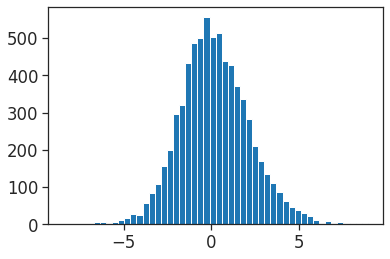

In [ ]:
# We can plot the distribution of the z-scores
plt.hist(z,bins=50)
plt.show()

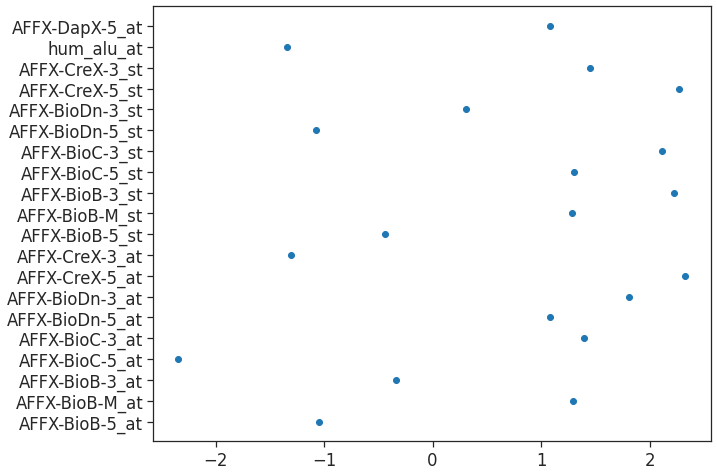

In [ ]:
# We can also make a scatter plot
# of the z-scores for 20 genes 
plt.figure(figsize=(10,8))
plt.scatter(z[:20].values,z[:20].index)
plt.show()

### Exercise: Get the 10 most differentially expressed genes and extract them from our dataset

**Hint:** Starting with the `z` scores, take the absoulte value using `.abs()`, and then sort with the function `.sort_values()`... slice the list so that you have the first 10 genes and then use those gene names to slice the `expr` data.

Name the result `diff_genes`.

In [ ]:
diff_genes = z.abs().sort_values(ascending=False)[:10].index

We can also create a heatmap of these genes for comparison to the above heatmaps

In [ ]:
# to visualize we want to order patients based on their true label
ordered_ids = np.append(patient_id_ALL,patient_id_AML)

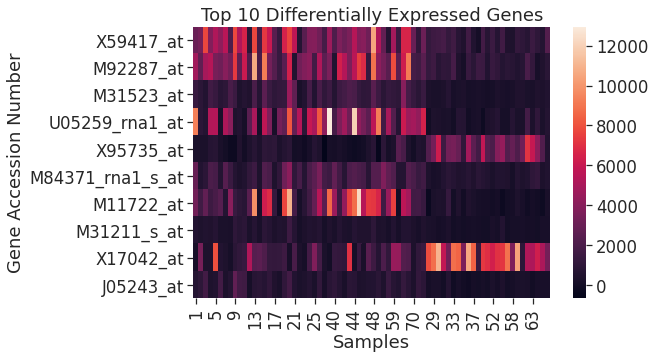

In [ ]:
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(data.loc[diff_genes,ordered_ids],ax=ax)
plt.xlabel("Samples")
plt.title("Top 10 Differentially Expressed Genes")
plt.show()

### Principal Components Analysis (PCA)

#### PCA is a technique for reducing the dimensions of your data. It decreases your feature space and can be used to visualize your data in 2D! You can read more about it [here](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c).

In [ ]:
data.T.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,AFFX-BioB-M_st,AFFX-BioB-3_st,AFFX-BioC-5_st,AFFX-BioC-3_st,AFFX-BioDn-5_st,AFFX-BioDn-3_st,AFFX-CreX-5_st,AFFX-CreX-3_st,hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-LysX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-PheX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-ThrX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-TrpnX-3_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,X53065_f_at,X64177_f_at,X67491_f_at,X71345_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,L41268_f_at,X99479_f_at,HG658-HT658_f_at,M94880_f_at,S80905_f_at,X03068_f_at,Z34822_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,HG2510-HT2606_at,L10717_at,L34355_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,-41,-831,-653,-462,75,381,-118,-565,15091,7,311,-231,21,-107,165,-78,-204,29,-61,-105,-366,-41,-346,-297,-109,-13,215,797,14538,9738,...,391,-763,172,149,341,788,21210,13771,598,396,245,14476,10882,701,2762,-325,-67,346,-68,229,-14,108,28,349,61,273,384,-306,-1827,1582,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,19,-743,-239,-83,182,164,-141,-423,11038,37,134,-161,-21,-180,18,-120,-65,97,15,-49,-330,-41,-772,-259,-192,-219,116,433,615,115,...,200,51,154,418,433,736,21059,15097,563,171,-149,13686,11789,76,1567,-191,-88,290,14,194,56,303,-242,214,-28,143,231,-336,-2380,624,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,19,-1135,-962,-232,208,432,84,-501,16692,183,378,-221,67,-203,238,-124,-161,36,-23,-80,-481,-65,-620,-269,-136,104,476,1474,5669,3272,...,387,-474,180,272,591,959,24292,17378,1808,363,325,6560,5023,804,1090,-258,9,220,-58,294,95,143,-25,464,513,238,720,-204,-1772,753,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,363,-934,-577,-214,142,271,-107,-101,15763,45,268,-27,43,-52,247,-116,-208,22,-10,-74,-240,-33,-560,-261,-366,-148,155,415,4850,2293,...,317,-336,325,149,173,431,17558,13818,576,455,594,8955,9567,367,1708,-357,45,430,-35,128,42,22,-131,342,142,277,307,-320,-2022,743,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,155,-471,-490,-184,32,213,1,-260,18128,-28,118,-153,-8,-111,44,-88,-102,32,5,-18,-228,53,-348,-169,-156,-55,122,483,1284,2731,...,162,-56,279,183,259,605,18530,15619,65,122,126,8443,8512,182,1503,-78,29,159,18,71,42,44,-33,159,71,134,178,-182,-179,626,156,649,57,504,-26,250,314,14,56,-25


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(data.T)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca = pd.DataFrame(pca.transform(data.T),columns = ["PC1","PC2"],index=data.columns)

In [ ]:
x_pca

,PC1,PC2
1,-12371.342663,-16505.711433
2,-37565.865905,57.597297
3,-19116.366877,-18216.295260
4,-8712.904180,-17386.572441
5,-29690.895295,-12205.170147
...,...,...
68,-23618.453041,-6940.029455
69,-37507.863555,-11478.310559
70,30685.427112,-19049.723413
71,-8912.556522,-10436.658601


In [ ]:
x_pca.shape

(72, 2)

In [ ]:
phenos.index = phenos.index.astype(str)

In [ ]:
x_pca["pheno"] = phenos["cancer"]

In [ ]:
x_pca

,PC1,PC2,pheno
1,-12371.342663,-16505.711433,ALL
2,-37565.865905,57.597297,ALL
3,-19116.366877,-18216.295260,ALL
4,-8712.904180,-17386.572441,ALL
5,-29690.895295,-12205.170147,ALL
...,...,...,...
68,-23618.453041,-6940.029455,ALL
69,-37507.863555,-11478.310559,ALL
70,30685.427112,-19049.723413,ALL
71,-8912.556522,-10436.658601,ALL


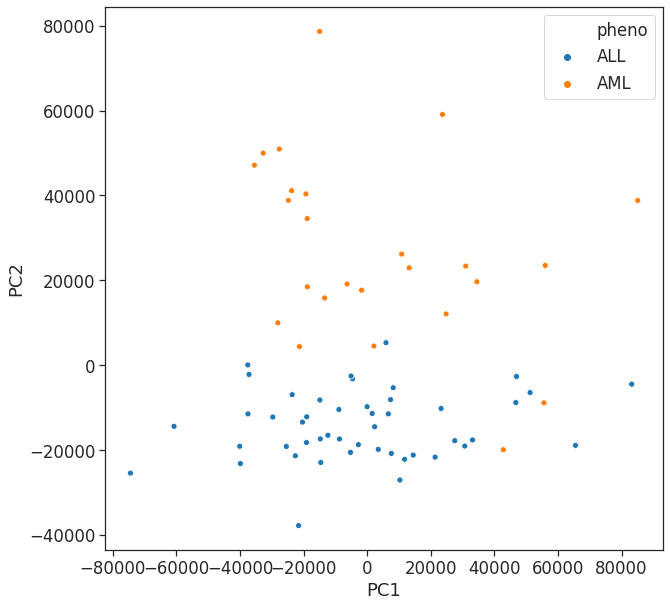

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x = "PC1", y = "PC2",hue="pheno",data=x_pca,ax=ax)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Wait... what was our goal again??

![](https://i.pinimg.com/originals/91/26/85/9126855a324c1f0cee23749457cda148.jpg)

### OUR GOAL: To predict whether a leukemia case is AML or ALL subtype from gene expression


Things we need to define:

1. What is our input?
1. What features should we include?
1. What is our output?
1. What is our model?
1. What hyperparameters do we need to define?
1. How well did we do on prediction?

# Data Clean-up / Quality Control

This is an important step in any analysis!! Arguably more important than creating your machine learning models because without "good" data we can't accurately make predictions.

## Step 1: Check for missing values
Machine learning models usually don't like NAs... we should make sure we don't have any and if we do we need to remove them!

In [ ]:
# We can use .isna to check which data entries are missing
# .any tells us if each column contains any mising values\
# what happens when you run data.isna().all() or data.isna().any(axis=1)
data.isna().any()

1     False
2     False
3     False
4     False
5     False
      ...  
68    False
69    False
70    False
71    False
72    False
Length: 72, dtype: bool

In this dataset we don't actually have any missing data, but it is something that is important to check.

**If there were missing values how should we have handled it?**

## Step 2: Reformat data
Most machine learning tools expect datasets to be samples x features but our dataset is features x samples. We can transpose the matrix for later analysis.

In [ ]:
data = data.T

In [ ]:
data.shape

(72, 7129)

In [ ]:
data.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,AFFX-BioB-M_st,AFFX-BioB-3_st,AFFX-BioC-5_st,AFFX-BioC-3_st,AFFX-BioDn-5_st,AFFX-BioDn-3_st,AFFX-CreX-5_st,AFFX-CreX-3_st,hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-LysX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-PheX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-ThrX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-TrpnX-3_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,X53065_f_at,X64177_f_at,X67491_f_at,X71345_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,L41268_f_at,X99479_f_at,HG658-HT658_f_at,M94880_f_at,S80905_f_at,X03068_f_at,Z34822_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,HG2510-HT2606_at,L10717_at,L34355_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,-41,-831,-653,-462,75,381,-118,-565,15091,7,311,-231,21,-107,165,-78,-204,29,-61,-105,-366,-41,-346,-297,-109,-13,215,797,14538,9738,...,391,-763,172,149,341,788,21210,13771,598,396,245,14476,10882,701,2762,-325,-67,346,-68,229,-14,108,28,349,61,273,384,-306,-1827,1582,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,19,-743,-239,-83,182,164,-141,-423,11038,37,134,-161,-21,-180,18,-120,-65,97,15,-49,-330,-41,-772,-259,-192,-219,116,433,615,115,...,200,51,154,418,433,736,21059,15097,563,171,-149,13686,11789,76,1567,-191,-88,290,14,194,56,303,-242,214,-28,143,231,-336,-2380,624,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,19,-1135,-962,-232,208,432,84,-501,16692,183,378,-221,67,-203,238,-124,-161,36,-23,-80,-481,-65,-620,-269,-136,104,476,1474,5669,3272,...,387,-474,180,272,591,959,24292,17378,1808,363,325,6560,5023,804,1090,-258,9,220,-58,294,95,143,-25,464,513,238,720,-204,-1772,753,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,363,-934,-577,-214,142,271,-107,-101,15763,45,268,-27,43,-52,247,-116,-208,22,-10,-74,-240,-33,-560,-261,-366,-148,155,415,4850,2293,...,317,-336,325,149,173,431,17558,13818,576,455,594,8955,9567,367,1708,-357,45,430,-35,128,42,22,-131,342,142,277,307,-320,-2022,743,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,155,-471,-490,-184,32,213,1,-260,18128,-28,118,-153,-8,-111,44,-88,-102,32,5,-18,-228,53,-348,-169,-156,-55,122,483,1284,2731,...,162,-56,279,183,259,605,18530,15619,65,122,126,8443,8512,182,1503,-78,29,159,18,71,42,44,-33,159,71,134,178,-182,-179,626,156,649,57,504,-26,250,314,14,56,-25


## Step 3: Split data into training and testing

Remember that in classification, which is a type of supervised machine learning, we must use a training set to teach our model how to correctly classify future examples. We also use a test set to test how good our model is.



The first step that we'll do is break up the dataset into training set and test set. We should split our data so that we have both AML and ALL cases present in both the training and testing data.



**What happens if we randomly create training and test data?**

In [ ]:
from sklearn.model_selection import train_test_split

# Split up the X (data) and y (phenos) datasets into train and test sets
# 25% of the dataset will be used for the test set
X_train, X_test, y_train, y_test = train_test_split(data,phenos,stratify=phenos,
                                                    test_size=0.3,random_state=35,)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50, 7129)
(22, 7129)
(50, 1)
(22, 1)


### Exercise: Get AML and ALL counts in the training and testing data

# Next Time: Machine Learning!

Scikit-learn is a powerful library because it allows us to easily apply all of the machine learning concepts that we've learned to real datasets with just a few lines of code.

**From our plot above we saw that there are genes that are differentially expressed between ALL and AML. We are now going to see if machine learning can select these informative features and classify ALL and AML accurately**

Remember the features of our dataset:

* 72 samples
* 2 classes: ALL (47 samples) and AML (25 samples)
* 7,129 features (genes with expression values)

We'll try making predictions using regression and random forests. If we have time we can try suggestions from the class! 